In [1]:
import networkx as nx

In [10]:
def f1():
    return 2

def f2(x):
    return x

# use the function f2 to get the value of f1
f2(f1())

2

In [14]:
None or None or None

In [3]:
type((1, 2))

tuple

In [2]:
(1, 1) == (1, 2)

False

In [2]:
map = "XXXXXXXXXXXX\nX...X..X..eX\nX.X....X.XXX\nX..X.X.X.X.X\nXX.XXX.X...X\nX........X.X\nXsXX...X...X\nXXXXXXXXXXXX"
print(map)
map_input = map.splitlines()
print(map_input)

XXXXXXXXXXXX
X...X..X..eX
X.X....X.XXX
X..X.X.X.X.X
XX.XXX.X...X
X........X.X
XsXX...X...X
XXXXXXXXXXXX
['XXXXXXXXXXXX', 'X...X..X..eX', 'X.X....X.XXX', 'X..X.X.X.X.X', 'XX.XXX.X...X', 'X........X.X', 'XsXX...X...X', 'XXXXXXXXXXXX']


# Map to graph

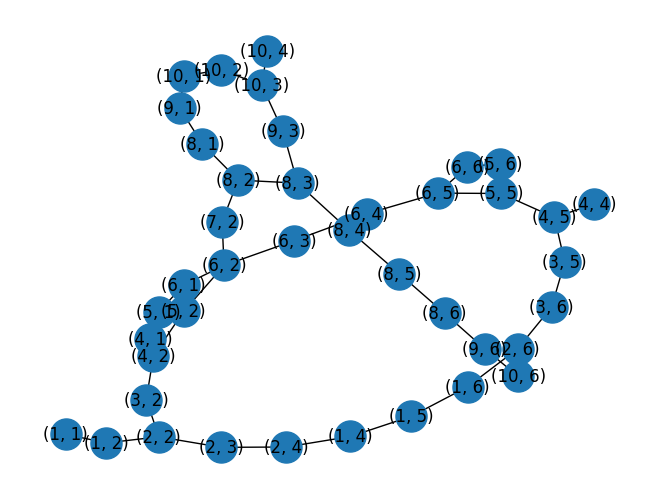

In [3]:
# takes in the processed map text and converts it to a graph
def map_to_graph(processed_map):

    # Create an empty graph
    graph = nx.Graph()

    # Add the nodes to the graph
    # nodes are the coordinates of each road tile in the map
    for y in range(len(processed_map)): # go from bottom up
        for x in range(len(processed_map[0])):
            if processed_map[y][x] != 'X': #1 is used to represent walls
                
                # reverse y axis order before adding node
                y_reverse = len(processed_map) - 1 - y
                graph.add_node((x, y_reverse))

    # Add the edges (connections) to the graph
    for node in graph.nodes:
        x, y = node

        # Check the top cell (y + 1)
        if (x, y + 1) in graph.nodes:
            graph.add_edge(node, (x, y + 1))

        # Check the bottom cell (y - 1)
        if (x, y - 1) in graph.nodes:
            graph.add_edge(node, (x, y - 1))

        # Check the left cell (x - 1)
        if (x - 1, y) in graph.nodes:
            graph.add_edge(node, (x - 1, y))

        # Check the right cell (x + 1)
        if (x + 1, y) in graph.nodes:
            graph.add_edge(node, (x + 1, y))

    return graph

graph = map_to_graph(map_input)
nx.draw(graph, pos=nx.spring_layout(graph), with_labels=True, node_size=500)

In [7]:
# get neighbors of a node
list(graph.neighbors((2, 2)))

[(2, 3), (1, 2), (3, 2)]

In [ ]:
def goLeft(x, y, orientation):
    if orientation == "N":
        x -= 1
    elif orientation == "E":
        y += 1
    elif orientation == "S":
        x += 1
    elif orientation == "W":
        y -= 1

    return x, y

def goForward(x, y, orientation):
    if orientation == "N":
        y += 1
    elif orientation == "E":
        x += 1
    elif orientation == "S":
        y -= 1
    elif orientation == "W":
        x -= 1

    return x, y

def goRight(x, y, orientation):
    if orientation == "N":
        x += 1
    elif orientation == "E":
        y -= 1
    elif orientation == "S":
        x -= 1
    elif orientation == "W":
        y += 1

    return x, y

def goBack(x, y, orientation):
    if orientation == "N":
        y -= 1
    elif orientation == "E":
        x -= 1
    elif orientation == "S":
        y += 1
    elif orientation == "W":
        x += 1

    return x, y

In [36]:
def LeftHandAlgorithm(graph, start_pos, end_pos):
    x, y = start_pos

    # array to store steps
    route_instructions = []

    # tuples are in order of left, forward, right, back according to current orientation
    facingNorth = [(-1, 0), (0, 1), (1, 0), (0, -1)]
    facingEast = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    facingSouth = [(1, 0), (0, -1), (-1, 0), (0, 1)]
    facingWest = [(0, -1), (-1, 0), (0, 1), (1, 0)]

    # keep track of orientation when moving through maze
    # compass = ["N", "E", "S", "W"]
    compass = [facingNorth, facingEast, facingSouth, facingWest]

    # keep track of how to turn the compass and the direction
    # ordered by left, forward, right, back
    turn = [-1, 0, 1, 2]
    turn_angle = [-90, 0, 90, 180]

    # set starting orientation to east (index of 1), this is default orientation the pen will face in turtle when it first starts
    # keep track of index in compass array, so that we can get index in O(1) time instead of using .index() which is O(n)
    # when changing index, always mod by 4 to keep it within range
    index = 1
    
    # keep finding the next node to go to until we reach the end
    while (x, y) != end_pos:
        # get current orientation
        current_orientation = compass[index]

        # find all neighbors of current node, convert to list as function returns a iterator
        neighbors = list(graph.neighbors((x, y)))

        # if neighbors is 4, means all 4 directions are available, always turn left
        if len(neighbors) == 4:
            # update current position and add to route instructions
            x, y = x + current_orientation[0][0], y + current_orientation[0][1]
            route_instructions.append(turn_angle[0]) # turn left first
            route_instructions.append((x, y))

            # update the new orientation, turn left means index 0
            index = (index + turn[0]) % 4


        # else if 1, 2 or 3 neighbours, we need to check every direction, starting from left > forward > right > back
        else:
            # direction is in order of left, forward, right, back
            for direction in range(len(current_orientation)):
                # check if the next node in the direction exists
                x_next, y_next = x + current_orientation[direction][0], y + current_orientation[direction][1]

                if graph.has_node((x_next, y_next)):
                    # update position and add to route instructions
                    x, y = x_next, y_next
                    route_instructions.append(turn_angle[direction]) # keep track of turn angle
                    route_instructions.append((x, y))

                    # update the new orientation
                    index = (index + turn[direction]) % 4

                    # break out of loop as we found the next node
                    break

    return route_instructions

In [37]:
LeftHandAlgorithm(graph, (1, 1), (10, 6))

(1, 1)


[-90,
 (1, 2),
 90,
 (2, 2),
 -90,
 (2, 3),
 0,
 (2, 4),
 -90,
 (1, 4),
 90,
 (1, 5),
 0,
 (1, 6),
 90,
 (2, 6),
 0,
 (3, 6),
 90,
 (3, 5),
 -90,
 (4, 5),
 0,
 (5, 5),
 -90,
 (5, 6),
 90,
 (6, 6),
 90,
 (6, 5),
 0,
 (6, 4),
 0,
 (6, 3),
 0,
 (6, 2),
 -90,
 (7, 2),
 0,
 (8, 2),
 -90,
 (8, 3),
 0,
 (8, 4),
 0,
 (8, 5),
 0,
 (8, 6),
 90,
 (9, 6),
 0,
 (10, 6)]

In [ ]:
def __LeftHandAlgorithm2(self, graph, start_pos, end_pos):
    print(start_pos)
    x, y = start_pos

    # array to store steps
    route_instructions = []

    # keep track of orientation when moving through maze
    compass = ["N", "E", "S", "W"]

    # set starting orientation to east, this is default orientation the pen will face in turtle when it first starts
    index = 1 # keep track of index in compass array, so that we can get index in O(1) time instead of using .index() which is O(n)
    current_orientation = compass[index]
    
    # keep finding the next node to go to until we reach the end
    while (x, y) != end_pos:
        # check left > right > forward > back

        # check if left node exists

        # check if right node exists

        # check if forward node exists

        # check if back node exists

    return route_instructions